In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

FileNotFoundError: [Errno 2] No such file or directory: 'output/Figure-3a.pdf'

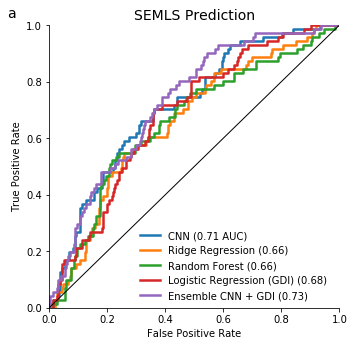

In [2]:
df = pd.read_csv("fig_data/Fig3a.csv")

fig, ax = plt.subplots(figsize=(5.2,5.2))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fpr_cnn, tpr_cnn, _ = roc_curve(df['SEMLS'],
          df['cnn_SEMLS_pred'])
fpr_rf, tpr_rf, _ = roc_curve(df['SEMLS'],
          df['rf_SEMLS_pred'])
fpr_rr, tpr_rr, _ = roc_curve(df['SEMLS'],
          df['rr_SEMLS_pred'])
fpr_gdi, tpr_gdi, _ = roc_curve(df['SEMLS'],
          df['GDI_SEMLS_pred'])
fpr_cnngdi, tpr_cnngdi, _ = roc_curve(df['SEMLS'],
          df['cnn_GDI_SEMLS_pred'])

rc_cnn = roc_auc_score(df['SEMLS'],
              df['cnn_SEMLS_pred'])

rc_rf = roc_auc_score(df['SEMLS'],
              df['rf_SEMLS_pred'])

rc_rr = roc_auc_score(df['SEMLS'],
              df['rr_SEMLS_pred'])

rc_gdi = roc_auc_score(df['SEMLS'],
              df['GDI_SEMLS_pred'])

rc_cnngdi = roc_auc_score(df['SEMLS'],
              df['cnn_GDI_SEMLS_pred'])

plt.plot(fpr_cnn,tpr_cnn,label="CNN (%.2f AUC)" % rc_cnn,linewidth=2.5)
plt.plot(fpr_rr,tpr_rr,label="Ridge Regression (%.2f)" % rc_rr,linewidth=2.5)
plt.plot(fpr_rf,tpr_rf,label="Random Forest (%.2f)" % rc_rf,linewidth=2.5)
plt.plot(fpr_gdi,tpr_gdi,label="Logistic Regression (GDI) (%.2f)" % rc_gdi,linewidth=2.5)
plt.plot(fpr_cnngdi,tpr_cnngdi,label="Ensemble CNN + GDI (%.2f)" % rc_cnngdi,linewidth=2.5)
leg = plt.legend( loc=(0.3,0.01) )
leg.get_frame().set_linewidth(0.0)

ax = plt.gca();
ax.set_xlim(0.0,1.0);
ax.set_ylim(0.0,1.0);

plt.text(-0.13, 1.04, "a",
        horizontalalignment='center',verticalalignment='center',
        transform=ax.transAxes,size=14)

plt.title("SEMLS Prediction",fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 1)
plt.savefig("output/Figure-3a.pdf",dpi=600,bbox_inches="tight",pad_inches=0.1)

In [ ]:
color = [x / 255. for x in [31,119,189]]
alpha = 153/255.

df = pd.read_csv("fig_data/Fig3b.csv")

sns.set(rc={'figure.figsize':(5.9,5.9),'axes.titlesize': 14})
sns.set_style("ticks")
ax = sns.regplot(df['SEMLS_dev_residual_pred_corrected'],
                 df['GDI'],
                 color=color, 
                 scatter_kws={'alpha':alpha})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.text(-0.13, 1.04, "b",
        horizontalalignment='center',verticalalignment='center',
        transform=ax.transAxes,size=14)

plt.text(0.85, 1-0.1, "r = %.2f" % (df.corr()['SEMLS_dev_residual_pred_corrected']["GDI"]),
         horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)


#plt.scatter(df[df['dataset'] == 'test']['SEMLS_dev_residual_pred_corrected'],df[df['dataset'] == 'test']['GDI'])
plt.xlabel("Predicted SEMLS residual")
plt.ylabel("GDI")
plt.title("GDI vs. Predicted SEMLS residual");
plt.savefig("output/Figure-3b.pdf",bbox_inches="tight",pad_inches=0.1)
plt.show()